Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

1 [Аналитика](#1)

- [Просмотр данных](#1.1)
- [топ-10 городов по количеству рейсов](#1.2)
- [Модели самолётов и количество рейсов](#1.3)
- [Города и количество рейсов](#1.4)
- [Просмотр данных](#1.5)
    
    
2 [Проверка гипотезы](#2)

- [Гипотеза](#2.1)
- [Вывод по гипотезе](#2.2)

3 [Вывод](#3)

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# 1. Аналитика<a id="1"></a>

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')

In [3]:
query_3 = pd.read_csv('/datasets/query_3.csv')

In [4]:
query_last = pd.read_csv('/datasets/query_last.csv')

In [5]:
dsts = [query_1, query_3, query_last]

## Просмотр данных<a id="1.1"></a>

In [6]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def preview(data):
    print('=='*5, 'Info' , '=='*5)
    display(data.info())
    print('=='*5, 'missing data', '=='*5)
    display(missing_data(data))
    print('=='*5, 'duplicated', '=='*5)
    display(data.duplicated().sum())
    print('=='*5, 'describe', '=='*5)
    display(data.describe().T)
    print('=='*5, 'inspection', '=='*5)
    display(data.head(10))

for df in dsts:
    preview(df)    

========== Info ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

========== missing data ==========


,Total,Percent
flights_amount,0,0.0
model,0,0.0


========== duplicated ==========


0

========== describe ==========


,count,mean,std,min,25%,50%,75%,max
flights_amount,8.0,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0


========== inspection ==========


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


========== Info ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

========== missing data ==========


,Total,Percent
average_flights,0,0.0
city,0,0.0


========== duplicated ==========


0

========== describe ==========


,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194


========== inspection ==========


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


========== Info ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


None

========== missing data ==========


,Total,Percent
festival_name,7,70.0
festival_week,7,70.0
ticket_amount,0,0.0
week_number,0,0.0


========== duplicated ==========


0

========== describe ==========


,count,mean,std,min,25%,50%,75%,max
week_number,10.0,34.500000,3.027650,30.0,32.25,34.5,36.75,39.0
ticket_amount,10.0,50670.400000,2502.752716,43568.0,51364.50,51439.0,51596.75,51675.0
festival_week,3.0,32.333333,3.214550,30.0,30.50,31.0,33.50,36.0


========== inspection ==========


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [7]:
# Рисует барплот агрегированных таблиц
# df  фрейм данных
# col_cetegory столбец с категориями
# col_count столбец с количественными данными
# title заголовок
def barplot_count(df, col_cetegory, col_count, title):
    fig, ax = plt.subplots(figsize = (10, 7))
    sns.barplot(x=df[col_cetegory], y=df[col_count], palette="deep", ax = ax)
    ax.set(xlabel=col_cetegory, ylabel=col_count) # 
    ax.set_title(title, fontsize=20, weight = 'bold')
    ax.set_xticklabels(df[col_cetegory])
    for item in ax.get_xticklabels(): item.set_rotation(90)  # перевернуть на 90 град. названия по х
    for i, v in enumerate(df[col_count].iteritems()):  # вывести       
        ax.text(i , v[1], "{:,}".format(round(v[1], 2)), color='r', va ='bottom', rotation= 60)
    plt.tight_layout()
    plt.show()
    
# возвращает топ из датафреймов с категориями
# dataframe, фрейм данных
# idx, столбец с категориями
# col_count, столбец с количественными данными
# top сколько вернуть значений
def get_top_all(dataframe, idx, col_count, top): 
    df_ = (dataframe.pivot_table(
        index = idx,
        values = col_count,
        aggfunc = 'sum')
    .sort_values(by = col_count, ascending = False)
    .head(top).reset_index()
    .reset_index(drop=True)
    )
    df_ = df_.sort_values([col_count], ascending = False)
    return df_

## Топ-10 городов по количеству рейсов<a id="1.2"></a>

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


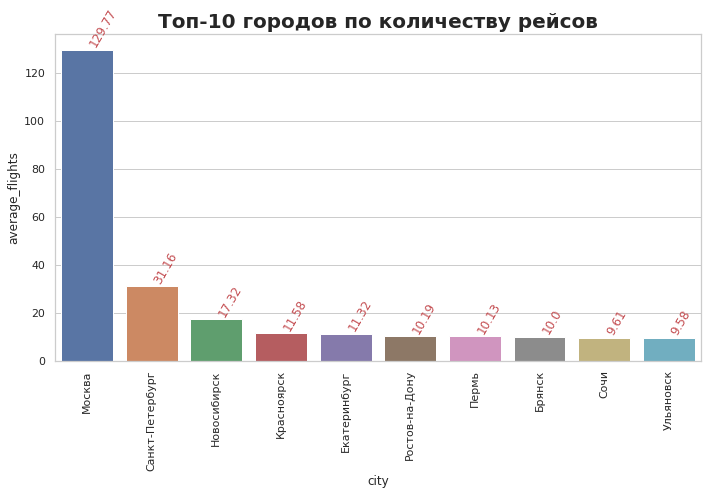

In [8]:
top_average_flights = get_top_all(query_3, 'city', 'average_flights', 10)
display(top_average_flights)
barplot_count(top_average_flights, 'city', 'average_flights', 'Топ-10 городов по количеству рейсов')

Москва является лидером в направлениях авиаперелетов

## Модели самолётов и количество рейсов<a id="1.3"></a>

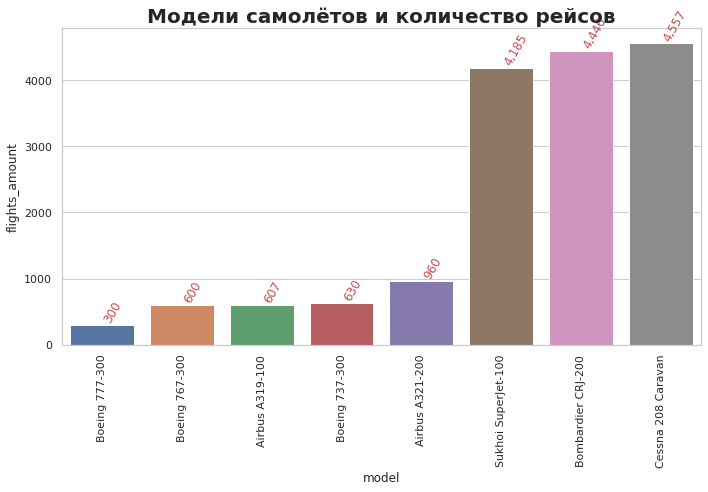

In [9]:
barplot_count(query_1.sort_values('flights_amount'), 'model', 'flights_amount', 'Модели самолётов и количество рейсов')

## Города и количество рейсов<a id="1.4"></a>

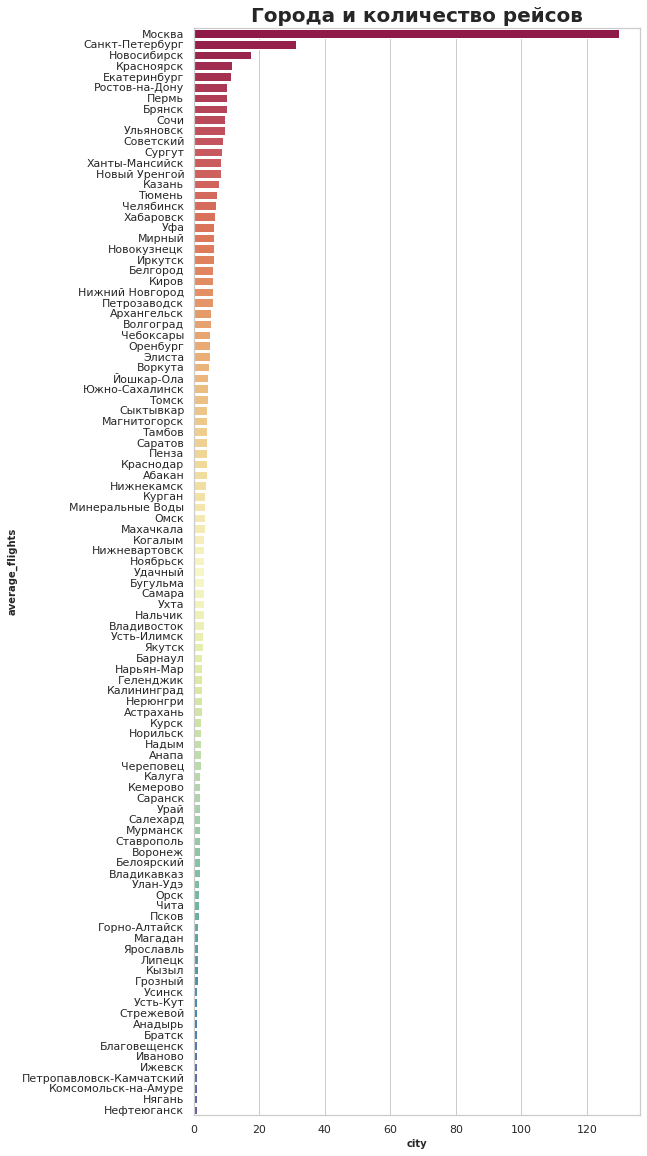

In [10]:
city_top = get_top_all(query_3, 'city', 'average_flights', len(query_3))
# barplot_count(city_top, 'city', 'average_flights', 'Города и количество рейсов')

fig, ax = plt.subplots()
fig.set_size_inches(8,20)
sns.barplot(x = city_top['average_flights'], y = city_top['city'], data=city_top, palette= "Spectral")
plt.xlabel('city', fontsize=10, weight = 'bold')
plt.ylabel('average_flights', fontsize=10, weight = 'bold')
plt.title('Города и количество рейсов', fontsize=20, weight = 'bold')
plt.show()

# 2. Проверка гипотезы<a id="2"></a>

### Гипотеза «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»<a id="2.1"></a>

In [11]:
# Т-Критерий Стьюдента
def t_criteria_student(frame1, frame2, alpha = .05):
    results = st.ttest_ind(frame1, frame2)
    print('p-значение:', results.pvalue)
# если p-value окажется меньше критический уровеня статистической значимости - отвергнем гипотезу
    if results.pvalue < alpha:    
        print("Отвергаем нулевую гипотезу")
    else:
        print("Нет оснований для отвержения нулевой гипотезы.")

In [12]:
# совместное распределение данных с отображением нормального распределения функции плотности вероятности
def print_distplot(name, column, binss):
    sns.distplot(column, hist=True, fit=st.norm, kde=False, bins = binss, label = name)
    
    
def hist_norm (df_list, binss=15):
    fig = plt.figure(figsize=(12, 5))
    for name, column in df_list.items():
        print_distplot(name, column, binss)
    fig.legend(loc = 'upper right', fontsize = 18)
    fig.tight_layout()

Разделим данные на дни фестивальные и обычные

In [13]:
festival_with = query_last.dropna()
festival_free = query_last[query_last['festival_week'].isnull()]

Смотрим "глазами" распределение. Так как мы сравниваем уже средние значания, то для проверки гипотезы подойдет T-критерий Стьюдента

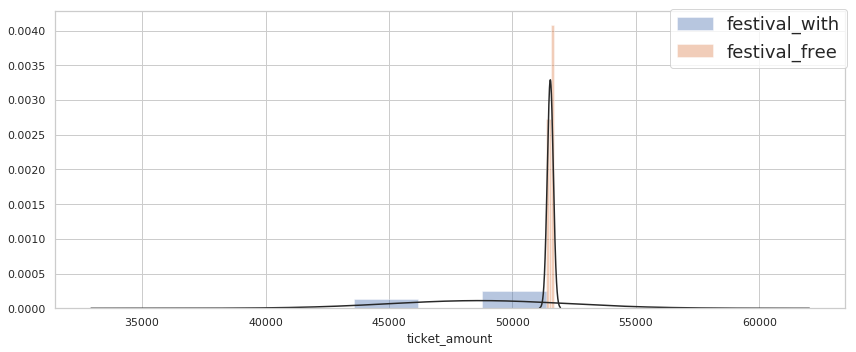

In [14]:
hist_list = {
    'festival_with':festival_with['ticket_amount'],
    'festival_free':festival_free['ticket_amount']
}
hist_norm (hist_list, binss=3)

Гипотезы являетюся двусторонними. Две группы проверяемых количественных значений, в каждой проверяемой гипотезе являются независимыми. Для проверки будет использоваться T-критерий Стьюдента для средних значений двух независимых выборок. Это двусторонний тест для нулевой гипотезы о том, что 2 независимые выборки имеют одинаковые средние (ожидаемые) значения. Этот тест предполагает, что популяции имеют одинаковые отклонения по умолчанию.Тест измеряет, является ли среднее (ожидаемое) значение существенно отличается в разных выборках. Если мы наблюдаем большое значение p, например больше alpha = 0,05 или 0,1, тогда мы не можем отвергнуть нулевую гипотезу об одинаковых средних баллах. Если значение p меньше порогового значения alpha, тогда мы отвергаем нулевую гипотезу о равных средних значениях.

**Проверим средний спрос на билеты во время фестивалей и спрос на билеты в обычное время на равенство.**


Исходя из природы Т критерия - о равенстве сравниваемых групп, формируем нулевую гипотезу H₀:

* **«Нет, разницы в спросе на билеты во время фестивалей и на билеты в обычное время нет»**, то есть исследуемые параметры равны.

Исходя из H₀ формулируется альтернативная гипотеза H₁:

* **«Да, спрос на билеты во время фестивалей и на билеты в обычное время различается»**

In [15]:
t_criteria_student(festival_with['ticket_amount'], festival_free['ticket_amount'], alpha = .05)

p-значение: 0.09688869045922928
Нет оснований для отвержения нулевой гипотезы.


### Вывод по гипотезе<a id="2.2"></a>
Гипотеза подтверждается. Средний спрос на билеты во время фестивалей **не отличается** от среднего спроса на билеты в обычное время

# 3. Вывод<a id="3"></a>
Спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали не отличается от среднего спроса на билеты в обычное время.